In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

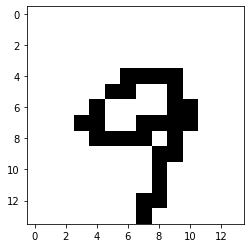

In [2]:
def get_image(filename,sample):
    X = pandas.read_csv(filename).values
    image = np.reshape(X[sample,:],(14,14))
    plt.figure()
    plt.imshow(image,cmap='gray')
    plt.show()


get_image('digitos/BD9_test.csv',5)

In [3]:
def get_dataset():
    Xtrain = pandas.read_csv('digitos/BD0_train.csv').values
    Ytrain = np.zeros((len(Xtrain)))
    for i in range(1,10):
        Xtrain_ = pandas.read_csv('digitos/BD'+str(i)+'_train.csv').values
        Ytrain_ = np.ones((len(Xtrain_)))*i
        Xtrain = np.concatenate((Xtrain,Xtrain_))
        Ytrain = np.concatenate((Ytrain,Ytrain_))
        
      
    Xtest = pandas.read_csv('digitos/BD0_test.csv').values
    Ytest = np.zeros((len(Xtest)))
    for i in range(1,10):
        Xtest_ = pandas.read_csv('digitos/BD'+str(i)+'_test.csv').values
        Ytest_ = np.ones((len(Xtest_)))*i
        Xtest = np.concatenate((Xtest,Xtest_))
        Ytest = np.concatenate((Ytest,Ytest_))
        
    
    return Xtrain,Xtest,Ytrain,Ytest
    
Xtrain,Xtest,Ytrain,Ytest = get_dataset()
print('Xtrain',Xtrain.shape,'Ytrain',Ytrain.shape)
print('Xtest',Xtest.shape,'Ytest',Ytest.shape)

Xtrain (50000, 196) Ytrain (50000,)
Xtest (5000, 196) Ytest (5000,)


In [4]:
model = LinearSVC()
model.fit(Xtest,Ytest)
ypred = model.predict(Xtrain)
print(accuracy_score(Ytrain,ypred))

m = confusion_matrix(Ytrain,ypred,labels= np.arange(0,10))
m = np.round(m/m.sum(axis=1),2)
df = pandas.DataFrame(m,index=np.arange(0,10),columns=np.arange(0,10))
print(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.83606
      0     1     2     3     4     5     6     7     8     9
0  0.94  0.00  0.01  0.00  0.01  0.01  0.02  0.00  0.01  0.00
1  0.00  0.92  0.02  0.00  0.00  0.01  0.00  0.01  0.04  0.00
2  0.01  0.01  0.82  0.02  0.04  0.01  0.03  0.03  0.03  0.01
3  0.01  0.01  0.07  0.78  0.01  0.04  0.01  0.02  0.04  0.02
4  0.00  0.00  0.01  0.00  0.87  0.01  0.02  0.01  0.02  0.05
5  0.02  0.02  0.02  0.05  0.04  0.75  0.04  0.01  0.04  0.01
6  0.01  0.01  0.01  0.00  0.01  0.01  0.93  0.00  0.01  0.00
7  0.02  0.01  0.00  0.01  0.03  0.01  0.00  0.87  0.01  0.05
8  0.01  0.03  0.03  0.03  0.01  0.07  0.02  0.01  0.76  0.03
9  0.01  0.01  0.00  0.02  0.11  0.03  0.00  0.07  0.03  0.71
